# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the sklearn library

what we are going to cover :
 - An end-to-end sklearn workflow
 - Getting the data ready
 - Choose the right estimator/algorithm for our problems
 - Fit the model/algorithm for our problems
 - Evaluating a model
 - Improve a model
 - Save and load a trained model
 - Putting it all together

### Standard Library Imports

#### For all machine learning projects,you'll often see these libraries(Matplotlib, NumPy and Pandas) imported at the top


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

## 0. An end-to-end sklearn workflow

#### We'll use 2 datasheets for demonstration purposes.
 - heart_diseases - a classification dataset(predicting whether someone has heart disease or not)
 - boston_df - a regression dataset(predicting the median house prices of cities in Boston)
 

#### 1. Get the data ready

In [2]:
heart_disease = pd.read_csv("C:/Users/HP/Desktop/IMP/Machine Learning/sklearn/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = heart_disease.drop("target",axis=1)

# Create Y(labels)
y = heart_disease["target"]

### 2. Choose the right model and hyperparameters

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3. Fit the model to a training data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)# 80% of data will be used for training and rest 20% will be used for testing

In [6]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
# make a prediction

# the prediction can not be made for 2D arrays, can only be made for 3D arrays only
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [8]:
Y_test

142    1
153    1
209    0
218    0
117    1
      ..
7      1
202    0
59     1
25     1
54     1
Name: target, Length: 61, dtype: int64

### 4. Evaluate the model based on the training data and test data

In [9]:
clf.score(X_train,Y_train) # It has a score 1 since the model has found patterns in the training data so well that it has a score of 100% because it was trained based upon all the features as well as all the labels

1.0

In [10]:
clf.score(X_test,Y_test)

0.819672131147541

In [11]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.89      0.82      0.86        40

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [12]:
confusion_matrix(Y_test, y_preds)

array([[17,  4],
       [ 7, 33]], dtype=int64)

In [13]:
accuracy_score(Y_test, y_preds)

0.819672131147541

### 5. Improve a model


In [14]:
### Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators....")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)#we need to fit the data before we train them
    print(f"Model Accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators....
Model Accuracy on test set: 83.61%

Trying model with 20 estimators....
Model Accuracy on test set: 80.33%

Trying model with 30 estimators....
Model Accuracy on test set: 81.97%

Trying model with 40 estimators....
Model Accuracy on test set: 85.25%

Trying model with 50 estimators....
Model Accuracy on test set: 86.89%

Trying model with 60 estimators....
Model Accuracy on test set: 83.61%

Trying model with 70 estimators....
Model Accuracy on test set: 83.61%

Trying model with 80 estimators....
Model Accuracy on test set: 88.52%

Trying model with 90 estimators....
Model Accuracy on test set: 86.89%



### 6. Save a model and load it

In [15]:
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, Y_test)

0.8688524590163934

 # Getting our data ready to be used with machine learning 

## Three main things we have to do
 1. Split the data into features and labels(usually 'x' & 'y')
 2. Filling (also called imputing) or disregarding missing values
 3. Converting non-numerical values to numerical values (also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
Y = heart_disease["target"]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Split the data into training and test set

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

In [21]:
x.shape[0] * 0.8 # training model data is 80% of total data

242.4

In [22]:
len(heart_disease)

303

### Make sure it's all numerical

In [23]:
car_sales = pd.read_csv(r"C:\\Users\\HP\\Desktop\\IMP\\Machine Learning\\sklearn\\car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

### Split into x/Y

In [26]:
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

### Split into training and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### ONE HOT ENCODING

 It is basically a process in which the categories of differentiation of data/categorical features are converted into numbers

### Convert the string into numbers by ONE HOT ENCODING

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # treat doors as categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",one_hot, categorical_features)] ,remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [29]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


### Build the machine the learning model

In [30]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
X_train, X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [31]:
model.score(X_test, y_test)

0.3235867221569877

### What if there were missing values?

1. Fill them with some value  (also known as imputation).
2. Remove the sample with missing data altogether

### Import car sales missing data

In [32]:
car_sales_missing = pd.read_csv(r"C:\\Users\\HP\\Desktop\\IMP\\Machine Learning\sklearn\\car-sales-extended-missing-data.csv")
car_sales_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Create X & y for missing data

In [34]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

### Let's try and convert it to numbers

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # treat doors as categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",one_hot, categorical_features)] ,remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1: Fill missing data with Pandas

In [36]:
#Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Color" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the "Odometer" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

#### Remove rows with missing Price value

In [37]:
car_sales_missing.dropna(inplace=True)

In [38]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # treat doors as categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",one_hot, categorical_features)] ,remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [40]:
car_sales_missing = pd.read_csv(r"C:\\Users\\HP\\Desktop\\IMP\\Machine Learning\\sklearn\\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

#### Split into X & y

In [43]:
X = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]

### Fill the missing values

#### Fill categorical values with missing and numerical values with mean

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#### Define columns

In [45]:
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#### Create an imputer (something that fills missing data)

In [46]:
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features), # cat imputer is gonna be used upon the cat_features
    ("door_imputer",door_imputer,door_features), # door imputer is gonna be used upon the door_features
    ("num_imputer",num_imputer,num_features)# num imputer is gonna be used upon the num_features
    ])

#### Transform the data

In [47]:
X_filled = imputer.fit_transform(X)
X_filled

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [48]:
car_sales_filled = pd.DataFrame(X_filled,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [49]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"] # treat doors as categorical features
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",one_hot, categorical_features)] ,remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

## Fit a model

In [51]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=2000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21789792310038358

In [52]:
len(transformed_X.toarray()),len(car_sales)

(950, 1000)

50 less values in the transformed is because we dropped the rows (50 total) with missing values in the car sales dataframe.

## 2. Choosing ther right estimators/algorithm for our problem

Some things to note:

 * SKlearn refers to machine learning models, algorithms as estimators
 * Classsification problem - predicting a category (heart diseases or not)
 * Sometimes you'll see 'clf'(short for classifier) used as a clasdsification estimator
 * Regression problem = predicting a number (selling price of a car)

If you're workling on a mchine learning problems and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning 
map: https://scikit-learn.org/stable/ 

### Picking a machine leanring model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

#### Get California housing dataset

In [53]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing["data"] , columns = housing["feature_names"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [55]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Import algorithm

In [56]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

#Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target",axis =1)
y = housing_df["target"] #Median house price in $100,000s

#Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate and fit the model(on the training set)
model = Ridge()
model.fit(X_train,y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440127

### NOTE : The target value here we are trying to estimate is the coefficient to determination which the model would predict based upon the given data

## What if the Ridge didn't work or score didn't fit our needs

## We could use a different model

## Trying an ensemble model(an ensemble is combination of a smaller models to try and make better predictions than just a single model)

### RandomForest
 It is a combination of a lots of descision trees. Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

#### Import the RandomForestRegressor model class from ensemble

In [57]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#### Create the data and split it into training and testing data

In [58]:
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Create the model and fit the data into it

In [59]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

#### Check the score of the model

In [60]:
model.score(X_test,y_test)

0.8065734772187598

# Choosing an estimator for a classification problem

In [61]:
heart_disease = pd.read_csv(r"heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
len(heart_disease)

303

### Consulting the map  and it says to try 'LinearSVC'

#### Import the LinearSVC estimator class

In [63]:
from sklearn.svm import LinearSVC
np.random.seed(42)

#### Make the data and split it into test and train data

In [64]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.80)

#### Instantiate classifier,fit the data into it and evaluate the score

In [65]:
clf = LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)
np.random.seed(42)
clf.score(X_test,y_test)

c:\PYTHON 311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\PYTHON 311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.4773662551440329

### 1. If we have structured data use ensembled methods
### 2. If we have non-structured data use deep learning or transfer learning methods

## Make predictions using a machine learning model

## Use a trained model to make predictions

### Two ways to make predictions:
 #### 1. predict()
 #### 2. predict_proba()

In [66]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [67]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [68]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1], dtype=int64)

### Compare predictions to truth labels to evaluate the model

In [69]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.4773662551440329

In [70]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
model.score(X_test,y_test)

0.5106393318965518

In [72]:
model.predict(X_test)

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [73]:
y_pred = model.predict(X_test)
np.mean(y_pred==y_test)

0.06557377049180328

## Making predictions with our Model (Regressions)

### predict() can also be used for regression model

In [74]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [75]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [76]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#Create the data
X=housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create the model instance
model = RandomForestRegressor(n_estimators=10)

#Fit the data into the  model
model.fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)
y_preds

array([0.5015  , 0.71    , 4.988908, ..., 4.664608, 0.7111  , 1.693   ])

In [77]:
y_preds[:10]

array([0.5015  , 0.71    , 4.988908, 2.5672  , 2.2266  , 2.017301,
       2.2945  , 1.7104  , 2.8141  , 4.579607])

In [78]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

### Compare the average difference between the predicted value and the true value

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3459883100775194

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(model , X , y , cv = 5)

array([0.46371616, 0.67853572, 0.71967448, 0.55490306, 0.66714545])

## Classification model evaluation metrics
  ### 1. Accuracy
  ### 2. Area under ROC curve
  ### 3. Confusion matrix
  ### 4. Classification report

#### Accuracy

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

model = RandomForestClassifier(n_estimators = 10)

X = heart_disease.drop("target",axis =1)
y = heart_disease["target"]

X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2)

crossvalscore = cross_val_score(model,X,y,cv=5)

In [82]:
crossvalscore

array([0.80327869, 0.83606557, 0.78688525, 0.81666667, 0.76666667])

In [83]:
np.mean(crossvalscore)

0.8019125683060109

### Area under Receiver Operating Characteristics curve
  #### * Area under curve(AUC)
  #### * ROC curve

ROC curves are comparison between a model's true positive rate(tpr) and a model's false positive rate(fpr)  

* True positive = the model predicts 1 when the truth is 1
* False positive = the model predicts 1 when the truth is 0
* True negative = the model predicts 0 when the truth is 0
* False negative = the model predicts 0 when the truth is 1 


In [84]:
#Create X_test etc......
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [85]:
from sklearn.metrics import roc_curve

#Fit the classifier
model.fit(X_train,y_train)

#Make predictions with probabilities
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.5, 0.5],
       [0.1, 0.9],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4]])

In [86]:
y_probs_positive = y_probs[:,1]
y_probs_positive

array([0.5, 0.9, 0.4, 0. , 0.8, 0.2, 0.4, 0.8, 0. , 0.4, 0.9, 0.5, 0.2,
       0.3, 0.9, 0.7, 0. , 0.1, 0.1, 0.9, 0.7, 0.1, 0.9, 0.1, 0.2, 0.8,
       0.5, 0.3, 1. , 0.9, 0.6, 0.6, 0.4, 0.7, 0.8, 0.2, 1. , 0.3, 0.3,
       0.1, 0.8, 0.5, 0.6, 0.8, 0.9, 0.6, 0.6, 0.1, 0.1, 1. , 0.3, 0. ,
       0.1, 0.8, 0.2, 0.1, 0. , 0.7, 0.7, 0.2, 1. ])

### Calculate fpr, tpr and threshold

In [87]:
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

#### Check the false positive rates

In [88]:
fpr

array([0.        , 0.        , 0.05714286, 0.22857143, 0.25714286,
       0.34285714, 0.45714286, 0.6       , 0.85714286, 1.        ])

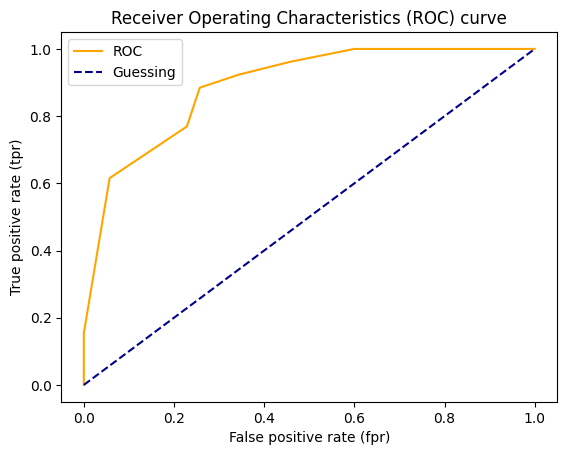

In [89]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange",label = "ROC")
    #Plot line with no prediction power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()


plot_roc_curve(fpr, tpr)    


In [90]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8895604395604395

### Plot  perfect ROC curve and AUC score

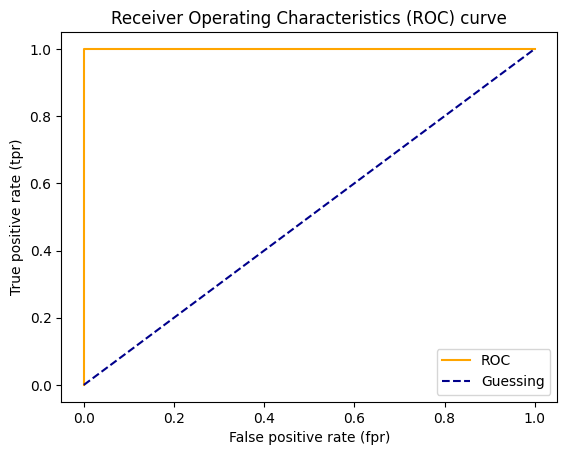

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

### Perfect AUC score

In [92]:
roc_auc_score(y_test,y_test)

1.0

### Confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [93]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[35,  0],
       [25,  1]], dtype=int64)

### Visualize confusion matrix with pd.crosstab()

In [94]:
pd.crosstab(y_test,y_preds,rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,35,0
1,25,1


In [95]:
(35+25+1) == len(X_test)

True

### Make our confusion matrix visual with Seaborn's heatmap

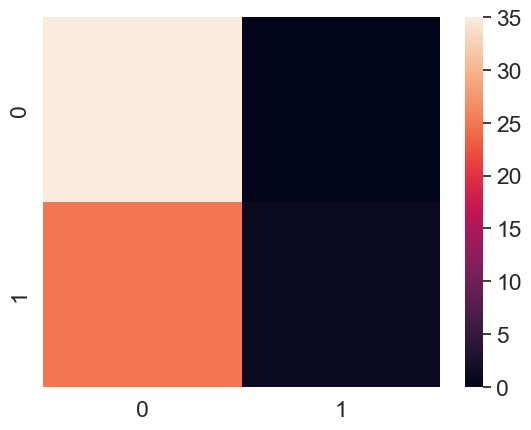

In [96]:
import seaborn as sns

sns.set(font_scale=1.5) #Set the font scale
conf_mat = confusion_matrix(y_test,y_preds) #Create a confusion matrix

#Plot it using Seaborn
sns.heatmap(conf_mat);

#### To use new methods of creating a confusion matrix with Scikit-learn you will need sklearn version

In [97]:
import sklearn
sklearn.__version__

'1.3.2'

In [98]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

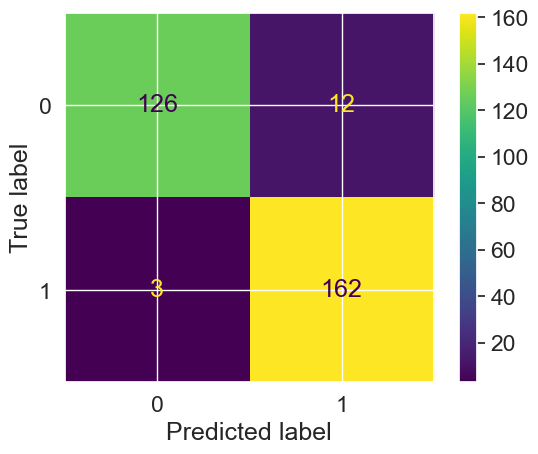

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=Y)

## Classification Report

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       1.00      0.04      0.07        26

    accuracy                           0.59        61
   macro avg       0.79      0.52      0.41        61
weighted avg       0.76      0.59      0.45        61



###  Where precision and recall become valuable

In [101]:
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

c:\PYTHON 311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\PYTHON 311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\PYTHON 311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classification metrics:
   #### - Accuracy is a good measure to start with if all classes are balances (e.g. same amount of samples)
   #### - Precision and recall become more important when classes are imbalanced
   #### - If false positive predictions are worse than false negatives, aim for higher precision
   #### - If flase negative predictions are worse than false positives, aim for higher recall
   #### - F1-score is a combination of precision and recall

## Regression model evaluation metrics

#### The ones we're going to cover
  #### 1. R^2 (pronounced r-squared) or co-efficient of determination
  #### 2. Mean absolute error (MAE)
  #### 3. Mean squared error (MSE)

In [102]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [103]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target",axis = 1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [105]:
model.score(X_test,y_test)

0.8065734772187598

In [106]:
y_preds = model.predict(X_test)

In [107]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [109]:
y_test.mean()

2.0550030959302323

## R^2 score or co-efficient of determination

#### Compares your model's prediction to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your perfectly predicts a range of numbers it's R^2 value would be 1.

In [110]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [111]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [112]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

## Mean Absolute Error (MAE)

#### MAE is the average of the absolute differences between predictions and actual values

#### It gives you an idea of how wrong your model predictions are.

In [113]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae 

0.32659871732073664

In [114]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [115]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [116]:
df = pd.DataFrame(data={"actual values" : y_test, "predicted values":y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [117]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

## Mean Squared Error (MSE) 

#### MSE is the mean of the square of the errors between actual and predicted values

In [118]:
#### Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [119]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


#### Calculate MSE by hand

In [120]:
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [121]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"] = 16

In [122]:
df_large_error.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [123]:
#### Calculate MSE with large error
df_large_error["squared differences"].mean()

0.2573437523766412

In [124]:
df_large_error.iloc[:100] = 20
df_large_error

,actual values,predicted values,differences,squared differences
20046,20.00000,20.000000,20.000000,20.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [125]:
df_large_error["squared differences"].mean()

0.7343870634568727

## Which regression metric should you use?

#### 1. R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
#### 2. MAE gives a better indication of how far off each of your's model's predictions are on average 
#### 3. As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
  #### a. Pay more attention  to MAE: when being $10,000 off is twice as bad being $5,000 off.
  #### b. Pay more attention to MSE: when being $10,000 off is more than twice as bad as being $5,000 off.

# Finally using the scoring parameter

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [127]:
np.random.seed(42)

#Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=10,scoring = None) # if scoring=None, estimator's default scoring evaluation metric is used for accurascy for classification models
cv_acc

array([0.80645161, 0.80645161, 0.87096774, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.76666667])

In [128]:
# Cross-validated accuracy
print(f"The cross-validated accuarcy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuarcy is: 81.84%


### Accuracy

In [129]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5,scoring="accuracy") 
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
# Cross-validated accuracy
print(f"The cross-validated accuarcy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuarcy is: 82.48%


### Precision

In [131]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [132]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.30%


### Recall

In [133]:
np.random.seed(42) 
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [134]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated precision is: 85.45%


### Let's see the scoring parameter being used for a regression problem...

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [136]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [137]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

## Mean absolute error

In [138]:
cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mse)

-0.48474651661821716

In [139]:
cv_mse

array([-0.52258481, -0.424984  , -0.50667074])